https://www.youtube.com/watch?v=kz_NJERCgm8 : Algorithmic Trading Strategy Using MACD & Python

- This program uses the **Moving Average Convergence / Divergence (MACD)** crossover to determine when to buy and sell stock.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Loading Stocks data
df = pd.read_csv("streaming_stocks_data.csv")
df.columns = ['timestamp','last_price','volume','scrip_id']
df.head()

,timestamp,last_price,volume,scrip_id
0,2020-08-03 09:16:00+05:30,100.65,74643,14
1,2020-08-03 09:17:00+05:30,100.60,58859,14
2,2020-08-03 09:18:00+05:30,100.65,30118,14
3,2020-08-03 09:19:00+05:30,100.60,49734,14
4,2020-08-03 09:20:00+05:30,100.30,33832,14


In [3]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
for i in range(len(df)):
    df['timestamp'][i] = df['timestamp'][i][:-6]

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp',inplace=True)
df.head()

C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,last_price,volume,scrip_id
timestamp,,,
2020-08-03 09:16:00,100.65,74643,14
2020-08-03 09:17:00,100.60,58859,14
2020-08-03 09:18:00,100.65,30118,14
2020-08-03 09:19:00,100.60,49734,14
2020-08-03 09:20:00,100.30,33832,14


In [4]:
df.shape

(7497, 3)

(array([737642., 737646., 737650., 737654., 737658., 737662., 737666.]),
 <a list of 7 Text xticklabel objects>)

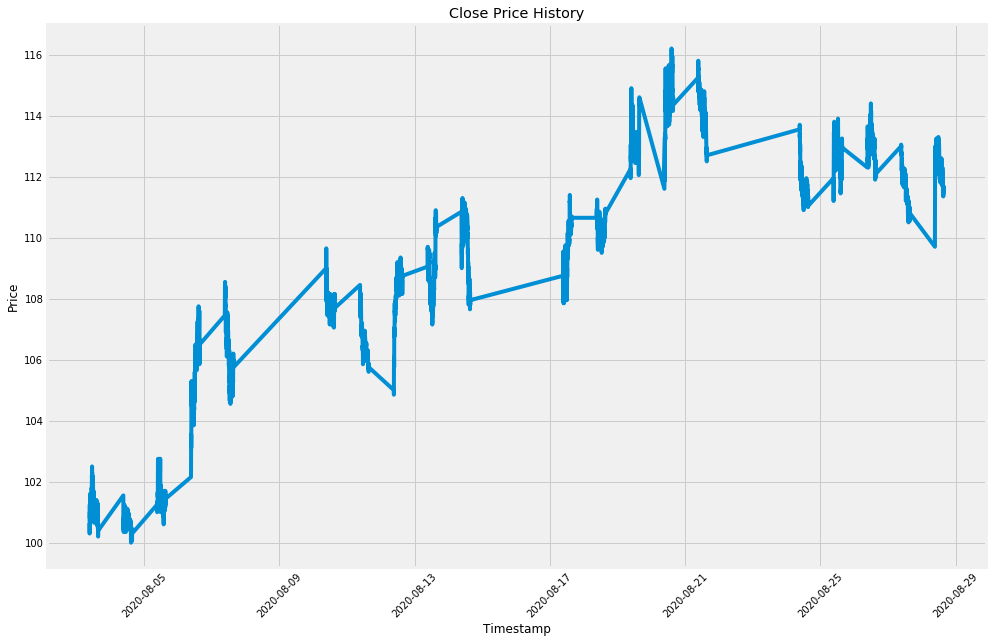

In [5]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(df['last_price'], label='Last Price')
plt.title('Close Price History')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)

In [6]:
# Calculate the MACD and signal line indicators
# Calculate the short term exponential moving average (EMA)
ShortEMA = df['last_price'].ewm(span=12, adjust=False).mean()

# Calculate the long term exponential moving average (EMA)
LongEMA = df['last_price'].ewm(span=26, adjust=False).mean()

# Calculate the MACD line
MACD = ShortEMA - LongEMA

# Calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()

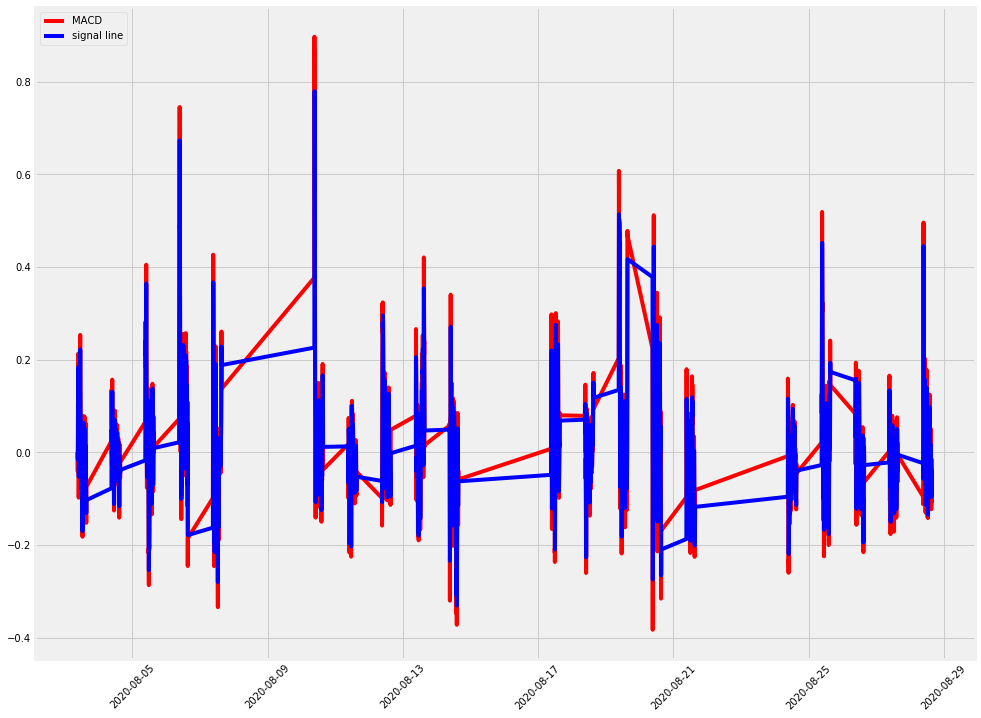

In [7]:
# Plot the figure
plt.figure(figsize=(15,12))
plt.plot(df.index, MACD, label='MACD', color='red')
plt.plot(df.index, signal, label='signal line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [8]:
# create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
df.head()

,last_price,volume,scrip_id,MACD,Signal Line
timestamp,,,,,
2020-08-03 09:16:00,100.65,74643,14,0.000000,0.000000
2020-08-03 09:17:00,100.60,58859,14,-0.003989,-0.000798
2020-08-03 09:18:00,100.65,30118,14,-0.003080,-0.001254
2020-08-03 09:19:00,100.60,49734,14,-0.006321,-0.002267
2020-08-03 09:20:00,100.30,33832,14,-0.032720,-0.008358


In [14]:
# Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
      
    for i in range(0, len(signal)):
        # if SMA > LMA  then buy else sell
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['last_price'][i])
                flag = 1
            else:
                Buy.append(np.nan)
                
                # print('Buy')
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['last_price'][i])
                flag = 0
            else:
                Sell.append(np.nan)
                    # print('sell')
        else: # Handling nan values
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell)

In [15]:
# Create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [16]:
df.head()

,last_price,volume,scrip_id,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
timestamp,,,,,,,
2020-08-03 09:16:00,100.65,74643,14,0.000000,0.000000,NaN,NaN
2020-08-03 09:17:00,100.60,58859,14,-0.003989,-0.000798,NaN,100.6
2020-08-03 09:18:00,100.65,30118,14,-0.003080,-0.001254,NaN,NaN
2020-08-03 09:19:00,100.60,49734,14,-0.006321,-0.002267,NaN,NaN
2020-08-03 09:20:00,100.30,33832,14,-0.032720,-0.008358,NaN,NaN


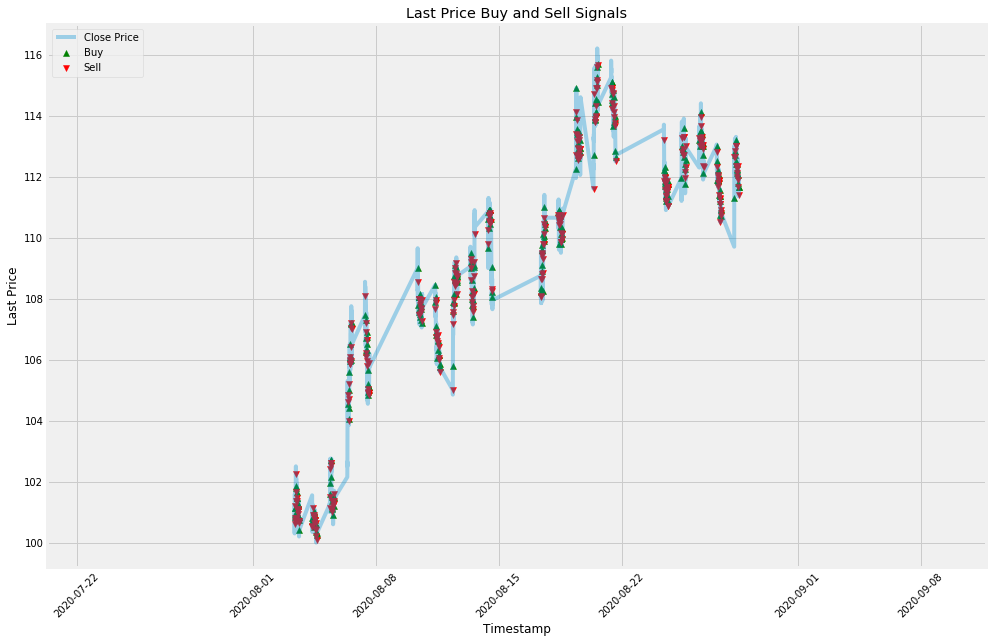

In [17]:
# Visually show the stock buy and sell signals
plt.figure(figsize=(15,10))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['last_price'], label='Close Price', alpha=0.35)
plt.title('Last Price Buy and Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Last Price')
plt.legend(loc='upper left')
plt.show()

----------------------------

In [12]:
# Function to signal when to buy and sell an asset

def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    cycle=0    
    for i in range(0,len(signal)):
        #if SMA > LMA  then buy else sell
        if signal['MACD'][i] > signal['Signal Line'][i]:
            if flag != 1:
                Buy.append(signal['last_price'][i])
                Sell.append(np.nan)
                flag = 1
            else:
                Buy.append(np.nan)
                Sell.append(np.nan)
                #print('Buy')
        elif signal['MACD'][i] < signal['Signal Line'][i]:
                if flag != 0:
                    Sell.append(signal['last_price'][i])
                    Buy.append(np.nan)
                    flag = 0
                else:
                    Buy.append(np.nan)
                    Sell.append(np.nan)
                    #print('sell')
        else: #Handling nan values
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell)

In [13]:
# Create buy and sell column
b = buy_sell(df)
df['Buy_Signal_Price'] = b[0]
df['Sell_Signal_Price'] = b[1]

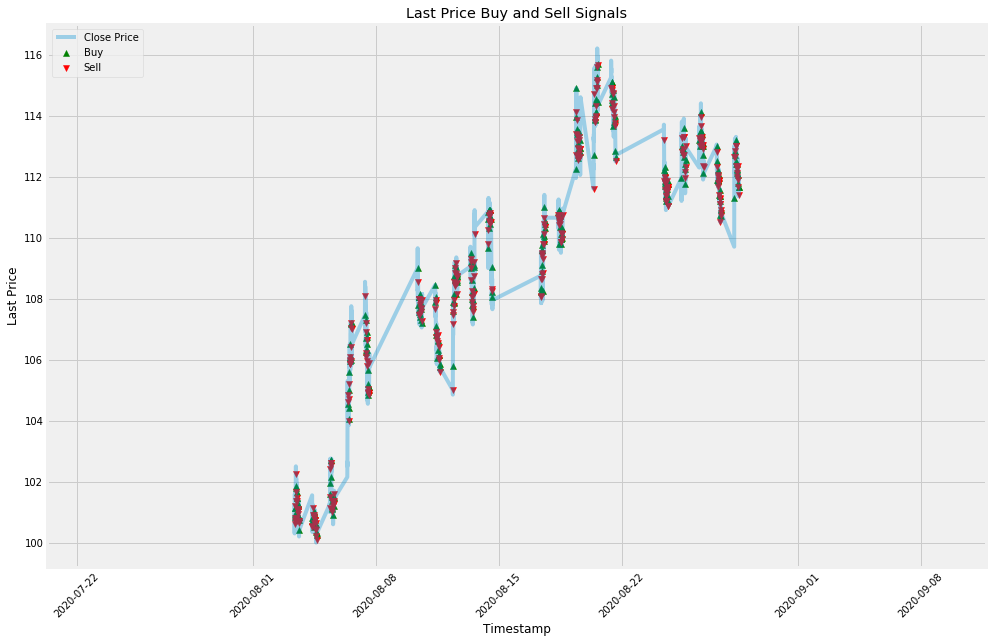

In [14]:
# Visually show the stock buy and sell signals
plt.figure(figsize=(15,10))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['last_price'], label='Close Price', alpha=0.35)
plt.title('Last Price Buy and Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Last Price')
plt.legend(loc='upper left')
plt.show()